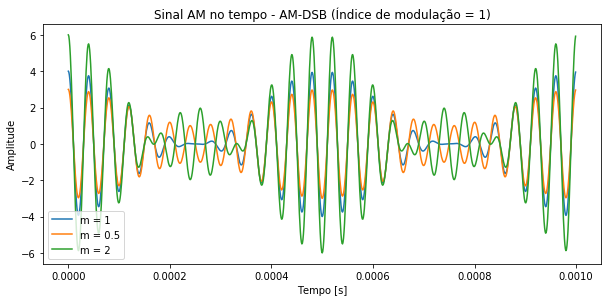

Potência via FFT (Parseval) =  3.0
Potência via FFT (Parseval) =  2.25
Potência via FFT (Parseval) =  6.0


In [31]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Parâmetros do sinal
Ac = 2                                                         # Amplitude da portadora
Mu1 = 1                                                        # Índice de modulação
Mu2 = 0.5                                                       # Índice de modulação
Mu3 = 2                                                       # Índice de modulação

fc = 25000                                                     # Frequência da portadora Hz
fm = 2000
N = 1000
Ts = 1e-6                                                      # Tempo de amostragem pequeno (modelar sinal contínuo)
t = np.arange(N)*Ts
s1 = Ac*(1+Mu1*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)
s2 = Ac*(1+Mu2*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)
s3 = Ac*(1+Mu3*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t)

# Gráfico do AM-DSB no tempo
plt.figure(1,[10,15])
plt.subplot(311)
plt.plot(t,s1)
plt.plot(t,s2)
plt.plot(t,s3)
plt.legend(["m = 1", "m = 0.5", "m = 2"])
plt.title("Sinal AM no tempo - AM-DSB (Índice de modulação = 1)")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

plt.show()

# Cálculo da FFT de AM-DSB
lfft = 30                                                      # Número pontos da fft
k = np.arange(-lfft,lfft)                                      # Vetor de frequências 
S_f1 = np.abs((fftpack.fft(s1)))/N                               # Cálculo da FFT
S_f2 = np.abs((fftpack.fft(s2)))/N                               # Cálculo da FFT
S_f3 = np.abs((fftpack.fft(s3)))/N                               # Cálculo da FFT

Px_fft1 = np.sum(S_f1*np.conj(S_f1))                              # Cálculo da potência na frêquencia
Px_fft2 = np.sum(S_f2*np.conj(S_f2))                              # Cálculo da potência na frêquencia
Px_fft3 = np.sum(S_f3*np.conj(S_f3))                              # Cálculo da potência na frêquencia

print('Potência via FFT (Parseval) = ',abs(Px_fft1))
print('Potência via FFT (Parseval) = ',abs(Px_fft2))
print('Potência via FFT (Parseval) = ',abs(Px_fft3))

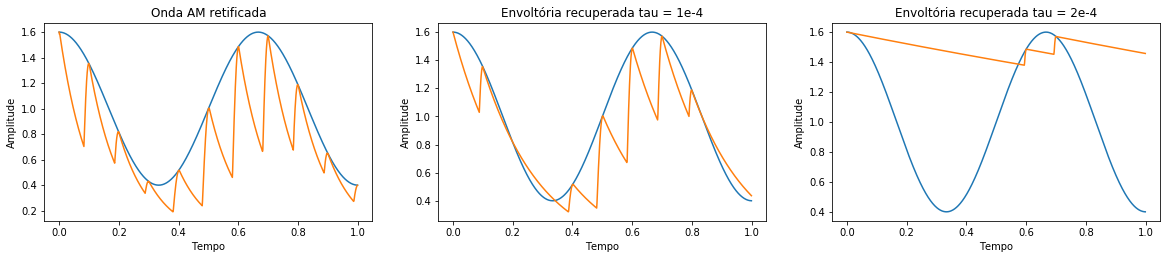

EMQ ->   tal = 1e-4: 0.302132791618            tal = 2e-4: 0.488599763378             tal = 4e-3: 1.56965503165


In [25]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack

tau1 = 1e-4                                                      # Constante de tempo do detector de envelope
tau2 = 2e-4                                                      # Constante de tempo do detector de envelope
tau3 = 4e-3                                                      # Constante de tempo do detector de envelope

Ts=1e-6                                                         # Definição do período
t = np.arange(1000)*Ts                                          # Definição do vetor tempo
fc = 10000                                                      # Frequência da portadora.
fm = 1500                                                       # Frequência do sinal
Mu = 0.6                                                        # Índice de modulaçao.
Ac = 1.0

x_AMo = Ac*(1.0+Mu*np.cos(2*np.pi*fm*t))*np.cos(2*np.pi*fc*t);  # Onda Modulada AM-DSB

x_envIdeal = np.abs(Ac*(1.0+Mu*np.cos(2*np.pi*fm*t)))           # Envoltória ideal

# Detector de envoltória
x_AM = (x_AMo>0)*x_AMo                                          # Efeito do diodo (semiciclo positivo)
x_env1 = np.zeros(len(x_AM))
x_env2 = np.zeros(len(x_AM))
x_env3 = np.zeros(len(x_AM))

Ns = len(x_AM)

# Detector de envoltória
x_AM = x_AMo*(x_AMo>0)                                          # Efeito do diodo (semiciclo positivo)
x_env1 = np.zeros(len(x_AM))
Ns = len(x_AM)

out1 = -1
for i in range(Ns):
    inp1 = x_AM[i]
    if inp1>=out1:
        out1 = inp1            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out1 *= (1-Ts/tau1)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env1[i] = out1
    
out2 = -1
for i in range(Ns):
    inp2 = x_AM[i]
    if inp2>=out2:
        out2 = inp2            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out2 *= (1-Ts/tau2)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env2[i] = out2

out3 = -1
for i in range(Ns):
    inp3 = x_AM[i]
    if inp3>=out3:
        out3 = inp3            # Caso 1: x_am(t) > Vc(t) (carga do capacitor)
    else:
        out3 *= (1-Ts/tau3)    # Caso 2: x_am(t) < Vc(t) (descarga do capacitor)
    x_env3[i] = out3
            

# Gráficos com a função plt.plot()
plt.figure(1,[20,8])

plt.subplot2grid((2, 3), (0, 0))
plt.plot(t*1000,x_envIdeal) 
plt.plot(t*1000,x_env1)                          
plt.title("Onda AM retificada")
plt.ylabel("Amplitude")
plt.xlabel("Tempo")

plt.subplot2grid((2, 3), (0, 1))
plt.plot(t*1000,x_envIdeal) 
plt.plot(t*1000,x_env2)                             
plt.title("Envoltória recuperada tau = 1e-4")
plt.ylabel("Amplitude")
plt.xlabel("Tempo")

plt.subplot2grid((2, 3), (0, 2))
plt.plot(t*1000,x_envIdeal) 
plt.plot(t*1000,x_env3)                             
plt.title("Envoltória recuperada tau = 2e-4")
plt.ylabel("Amplitude")
plt.xlabel("Tempo")


#plt.subplots_adjust(hspace=0.9) # Ajustando espaço entre subplots

plt.show()

EMQ1 = sum(((x_envIdeal - x_env1)**2)/len(x_envIdeal))
EMQ2 = sum(((x_envIdeal - x_env2)**2)/len(x_envIdeal))
EMQ3 = sum(((x_envIdeal - x_env3)**2)/len(x_envIdeal))

#print('Tempo da DFT = ', EMQ1)
#print('Tempo da DFT = ', EMQ2)
#print('Tempo da DFT = ', EMQ3)

Erro1 = (np.sum((x_AM - x_env1)**2))/len(x_AM)
Erro2 = (np.sum((x_AM - x_env2)**2))/len(x_AM)
Erro3 = (np.sum((x_AM - x_env3)**2))/len(x_AM)

print('EMQ ->   tal = 1e-4:',abs(Erro1), '           tal = 2e-4:',abs(Erro2),'            tal = 4e-3:',abs(Erro3))

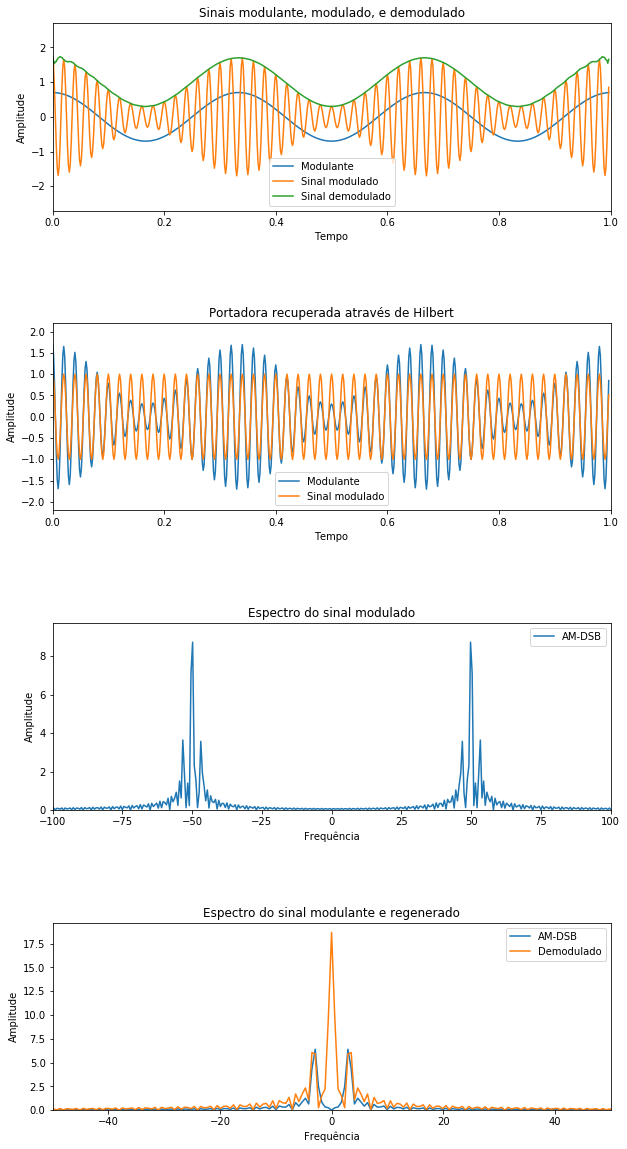

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack
from scipy.signal import hilbert
import scipy.fftpack as ff

Fs = 600
t = np.arange(0,1-(1/Fs),(1/Fs))                             # Definição do vetor tempo
fc = 50                                                      # Frequência da portadora.
fm = 3                                                       # Frequência do sinal
Mu = 0.7                                                     # Índice de modulaçao.
Ac = 1.0

x_modulante = Mu*np.cos(2*np.pi*fm*t)                        # Sinal modulante
x_portadora = np.cos(2*np.pi*fc*t)                           # Portadora

x_AM = Ac*(1.0 + x_modulante)*x_portadora;                   # Onda Modulada AM-DSB

x_demAM = hilbert(x_AM)                                      # Demodulação através de Hilbert

inst_phase = np.unwrap(np.angle(x_demAM));                   # Fase instantânea 
x_portadora_rec = np.cos(inst_phase)                         # Criação de cosseno a partir da frequência instantânea

# FFT
lfft = len(t)                                                # Definição comprimento do vetor  
lfft = int(2**np.ceil(np.log2(lfft)))                        # Transforma o comprimento em potência de 2
freq = np.arange(-lfft/2,lfft/2,1)/(lfft/Fs)                 # Definição do eixo de frequência

x_AM_fft = ff.fftshift(ff.fft(x_AM,lfft,axis=0)/np.sqrt(lfft))             # Espectro do sinal modulado
x_AM_fft = np.abs(x_AM_fft)

x_M_fft = ff.fftshift(ff.fft(x_modulante,lfft,axis=0)/np.sqrt(lfft))       # Espectro do sinal modulante
x_M_fft = np.abs(x_M_fft)

x_dem_fft = ff.fftshift(ff.fft(np.abs(x_demAM),lfft,axis=0)/np.sqrt(lfft)) # Espectro do sinal demodulado
x_dem_fft = np.abs(x_dem_fft)

# Plot
plt.figure(1,[10,20])
plt.subplot(411) 
plt.plot(t,((x_modulante)))                                                # Sinal modulante
plt.plot(t,x_AM)                                                           # Sinal modulado
plt.plot(t,np.abs((x_demAM)))                                              # Sinal demodulado (hilbert)
plt.legend(["Modulante", "Sinal modulado", "Sinal demodulado"])
plt.axis([0, 1, min(x_AM)-1, max(x_AM)+1])
plt.title("Sinais modulante, modulado, e demodulado")
plt.ylabel("Amplitude")
plt.xlabel("Tempo")

plt.subplot(413)
plt.plot(freq,x_AM_fft)                                                    # Espectro do sinal modulado
plt.axis([-100, 100, 0, max(x_AM_fft)+1])
plt.legend(["AM-DSB"])
plt.title("Espectro do sinal modulado")
plt.ylabel("Amplitude")
plt.xlabel("Frequência")

plt.subplot(414)
plt.plot(freq,x_M_fft)                                                     # Espectro do sinal modulante
plt.plot(freq,x_dem_fft)                                                   # Espectro do sinal demodulado
plt.axis([-50, 50, 0, max(x_dem_fft)+1])
plt.legend(["AM-DSB", "Demodulado"])
plt.title("Espectro do sinal modulante e regenerado")
plt.ylabel("Amplitude")
plt.xlabel("Frequência")

plt.subplot(412)
plt.plot(t,x_AM)                                                           # Sinal modulado
plt.plot(t,x_portadora_rec)                                                # Portadora
plt.axis([0, 1, min(x_AM)-0.5, max(x_AM)+0.5])
plt.legend(["Modulante", "Sinal modulado", "Sinal demodulado"])
plt.title("Portadora recuperada através de Hilbert")
plt.ylabel("Amplitude")
plt.xlabel("Tempo")

plt.subplots_adjust(hspace=0.6)                                            # Ajustando espaço entre subplots

plt.show()